#Homework 3: Coffea Arabica Quality

*In this homework, you are going to work with the coffea arabica quality  dataset.*

**Submission Instructions**

---
It is important that you follow the submission instructions. 
1. Copy this assignment notebook to your Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it as <font color = 'green'>`Lastname_Firstname_hw3`</font>.

2. Write your solutions in the cells  marked <font color = 'green'>`# your code`</font>.

3. **Do not delete your outputs. They are essential for the grading. Make sure that cells containing your solutions are executed, and the results are displayed in the notebook.**

4. When you're done, please submit your solutions as an <font color="red">`.ipynb`</font> file. To do so:


*   Click on <font color="red">`File`</font>  at the top left on the Colab screen, then click on <font color = 'red'>`Download .ipynb`</font>.
*   Then submit the downloaded <font color="red">`.ipynb`</font> version of your work on SUCourse.

For any question, you may send an email to the TAs and LAs.

---

In this homework, you will work on a dataset about [Coffea Arabica Quality](https://github.com/jldbc/coffee-quality-database). 

For this homework, you will use the provided file `arabica_data.csv`. This is a cleaned and updated version of the original dataset, which contains information of arabica coffee beans from the Coffee Quality Institute's trained reviewers.


Below, you can find all the set of features, provided in the dataset:
*   **Quality Measures**
    * Aroma
    * Flavor
    * Aftertaste
    * Acidity
    * Body
    * Balance
    * Uniformity
    * Clean.Cup
    * Sweetness
    * Cupper.Points	
    * Moisture


*   **Bean Metadata**
    * Processing.Method
    * Color
    * Harvest.Year
    * Grading.Date

*   **Farm Metadata**
    * Owner
    * Country.of.Origin
    * Farm.Name
    * Lot.Number
    * Mill
    * Company
    * Region
    * Producer
    * Altitude

*Do not forget to add the shared `arabica_data.csv` file to your drive and mount to your drive. Otherwise, you won't be able to read the file.*

In [ ]:
from google.colab import drive
drive.mount("./drive")

path_prefix = "./drive/My Drive"

Mounted at ./drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

In [ ]:
fname = "arabica_data.csv"
df = pd.read_csv(join(path_prefix, fname))
df.head(2)

,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,Company,Region,Producer,Harvest.Year,Grading.Date,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Moisture,Color,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,metad plc,Ethiopia,metad plc,NaN,metad plc,metad agricultural developmet plc,guji-hambela,METAD PLC,2014,"April 4th, 2015",Washed / Wet,8.033884,7.963169,7.330932,8.283544,9.205563,8.513634,10.0,10.0,10.0,7.815878,0.12,Green,m,1950.0,2200.0,2075.0
1,metad plc,Ethiopia,metad plc,NaN,metad plc,metad agricultural developmet plc,guji-hambela,METAD PLC,2014,"April 4th, 2015",Washed / Wet,5.721737,7.097335,5.360303,5.011347,8.881139,8.360832,10.0,10.0,10.0,8.545422,0.12,Green,m,1950.0,2200.0,2075.0


# Q1: Removing Columns with High Missing Values

It is not possible to find a perfect dataset. During data collection, some values can be lost. These lost values are called as missing values. In the DataFrame, missing values are usually labelled as `NaN`.

In this question, you will remove the columns which contain high number of missing values. If the missing value percentage in a column is greater than or equal to 20%, you will drop that column. 
* First, print the number of columns in the dataset.
* Secondly, if missing value percentage in a column is greater than or equal to 20%, print the name of the column and the percentage of missing values in that column. Also, remove this column from dataset.
* Lastly, after removing columns, print the number of remaining columns in the dataset.

Your output should be like:
```
Initially, there are [...] columns 

[...]% of the values are missing in [...] column
.
.
.

After removing columns with high missing value percentage, there are [...] columns 
```

In [ ]:
# your code
print("Initially, there are "+str(len(df.columns))+" columns")
missing = df.isnull().sum() * 100 / len(df)
for i in range(len(df.columns)-1):
  missing = df.isnull().sum() * 100 / len(df)
for i in range(len(df.columns)-1):
  if(missing[i] >= 20):
    print(str(missing[i])+"% of the values are missing in "+str(df.columns[i])+" column")
    df.drop(df.columns[i], axis=1, inplace=True)
    i = i-1
print("After removing columns with high missing value percentage, there are "+str(len(df.columns))+" columns")

Initially, there are 27 columns
27.15484363081617% of the values are missing in Farm.Name column
79.40503432494279% of the values are missing in Mill column
23.64607170099161% of the values are missing in Region column
After removing columns with high missing value percentage, there are 24 columns


# Q2: Calculating Total Quality Score

There are several columns (Quality Measures) in the dataset that evaluates the quality of a coffee bean in different aspects. Unfortunately, dataset owner forgot to calculate the total quality score for each coffee bean. 

In this question, your task is to:
* Create a new column called `Total Score` which will store the sum of values in `Quality Measure` columns. 
* Then, print basic statistics (mean, std, min, max, etc.) on `Total Score` column. Remember that there is function that you can use to achieve this goal.

Your answer should be exactly same as the figure below:

![](https://i.ibb.co/9vDpc7x/Screen-Shot-2021-11-08-at-21-08-14.png)

In [ ]:
# your code
Quality = ["Aroma","Flavor","Aftertaste","Acidity","Body","Balance","Uniformity","Clean.Cup","Sweetness","Cupper.Points","Moisture"]
list1=[]
list2=[]

for i in range(len(df)):
  total=0
  for i2 in Quality:
    index = (df.columns.get_loc(i2))
    total=total+df.iloc[i][index]
  list1.append(total)

df2 = (pd.Series(list1,name="Total Score").describe(include=[np.number])).to_frame()
print(df2)

       Total Score
count  1311.000000
mean     84.553229
std       3.526415
min      51.713880
25%      82.457379
50%      84.726141
75%      86.966816
max      94.723712


# Q3: Unit Conversion

Altitude of the farm has a crucial affect on bean quality. High altitudes are considered ideal for growing the coffee plant, with cooler temperatures delaying the growth cycle whereas Low-altitude coffee plants produce higher yields due to faster ripening times, but the beans need to be treated differently than those from higher altitudes — all the way from roast to brew. In this dataset, altitude information for each coffee bean is shared. However, some of the altitude values are stored in metric system (meters) and some of them stored in imperial system (feet). 

In this question, you will convert values in `altitude_mean_meters` column from feet to meters. (As a side note, 1 Feet = 0.3048 Meters) You can use `unit_of_measurement` column to check which system was used for each bean.
1. First of all, print the number of beans recorded in metric system. Then print the mean of `altitude_mean_meters` column for the beans recorded in metric system.
2. Secondly, print the number of beans recorded in imperial system. Then print the mean of `altitude_mean_meters` column for the beans recorded in imperial system.
3. Convert feet values to meters in `altitude_mean_meters` column.
4. Lastly, print the mean of `altitude_mean_meters` column for all beans.

At the end, your cell output should be exactly same as:
```
[...] beans are recorded in metric system
Mean of altitude_mean_meters column, for the beans recorded in metric system:  [...]  meters

[...] beans are recorded in imperial system
Mean of altitude_mean_meters column, for the beans recorded in imperial system:  [...]  feet

After unit conversion, Mean of altitude_mean_meters column for all beans:  [...]  meters
```

In [ ]:
# your code
m=0
ft=0
metrictotal=0
imperialtotal=0
index = (df.columns.get_loc("unit_of_measurement"))
index2 = (df.columns.get_loc("altitude_mean_meters"))

for i in range(len(df)):
  unit=df.iloc[i][index]
  if unit =="m":
    if(str(df.iloc[i][index2]).isalpha()==False):
      m =m+1;
      metrictotal=metrictotal+float(df.iloc[i][index2])
  elif unit =="ft":
    if(str(df.iloc[i][index2]).isalpha()==False):
      ft = ft+1
      imperialtotal=imperialtotal+float(df.iloc[i][index2])
      df.at[i,"unit_of_measurement"]="m"
      df.at[i,"altitude_mean_meters"]=df.at[i,"altitude_mean_meters"]*0.3048

print(str(m)+" beans are recorded in metric system")
print("Mean of altitude_mean_meters column, for the beans recorded in metric system: "+str(metrictotal/m)+" meters \n")

print(str(ft)+" beans are recorded in imperial system")
print("Mean of altitude_mean_meters column, for the beans recorded in imperial system: "+ str(imperialtotal/ft)  +" feet\n")
print("After unit conversion, Mean of altitude_mean_meters column for all beans: "+ str(df["altitude_mean_meters"].mean())  +" meters")

973 beans are recorded in metric system
Mean of altitude_mean_meters column, for the beans recorded in metric system: 1841.2261048304213 meters 

111 beans are recorded in imperial system
Mean of altitude_mean_meters column, for the beans recorded in imperial system: 3852.861470270268 feet

After unit conversion, Mean of altitude_mean_meters column for all beans: 1772.9391988481198 meters


# Q4: Processing Method Distribution

There are several methods for processing the coffee bean which effects the sweetness, body, and acidity of brewed coffee. In the dataset, `Processing.Method` column indicates the processing information for each coffee bean.

Find the number of coffee beans in each `Processing.Method` and display their percentages as bar chart. 

*   Bars should be displayed in ascending order.
*   Use `#A45D5D` color for bars and display white grids in each bar.
*   Method names in X axis should be rotated by 30 degrees.
*   Share percentages in Y axis should increase by 10%.

The result should be exactly same as the figure below.

![](https://i.ibb.co/PrgSTTq/download.png)

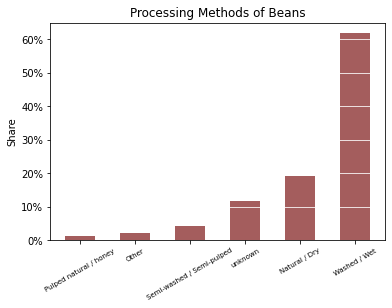

In [ ]:
# your code
index = (df.columns.get_loc("Processing.Method"))
methods={}
total=0
for i in range(len(df)):
  method=df.iloc[i][index]
  total=total+1
  if str(method) == "nan":
    method="unknown"
  if method in methods.keys():
    methods[method] +=1
  else:
    methods[method] =1
smethods={}

for i in sorted(methods.values()):
    for k in methods.keys():
        if methods[k] == i:
            smethods[k] = methods[k]
            break
methods={}
for i in list(smethods.keys()):
  methods[i]=(smethods.get(i)/total)*100
x = methods.keys()
y = methods.values()
ticks = []
ticksint =[]
for i in range(int(max(y))):
  if i%10==0: 
    ticksint.append(i)
    ticks.append(str(i)+"%")

interval=list(np.arange(0,1.5*len(x), 1.5))
plt.bar(interval, y, color ="#A45D5D")
plt.xticks(fontsize=7,rotation=30)
plt.xticks(interval,x)
plt.ylabel("Share")
plt.title("Processing Methods of Beans")
plt.yticks(ticksint,ticks)
plt.grid(axis="y", color="white")
plt.show()

# Q5: Body Distribution by Processing Method

In the previous question, you have explored the distribution of processing methods of coffee beans in the dataset. In this question, you are going to explore the relationship between processing method and bean body rating by using violinplots. You can access processing method information from `Processing.Method` column and bean body rating from `Body` column.

* `Processing.Method` categories in X axis should have ascending order w.r.t `Body` median. 
* Tick values in Y axis should be limited to two decimals points. As an example, value `8.888888889` should be converted to `8.88`. (`8.89` is also acceptable)
* Display the median for each violinplot. Do not forget to add title and labels.

The result should look like the figure below.
![](https://i.ibb.co/qmywjHq/download-1.png)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


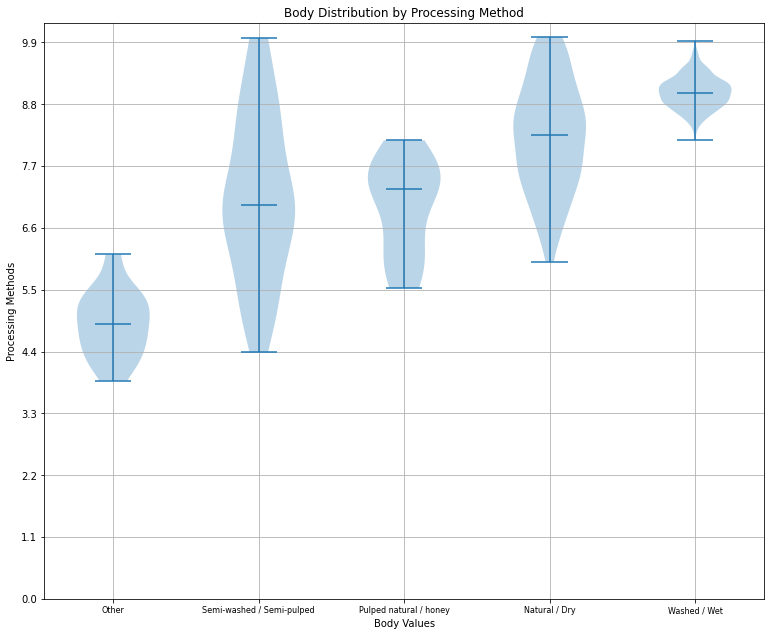

In [ ]:
# your code
index = (df.columns.get_loc("Processing.Method"))
index2 = (df.columns.get_loc("Body"))
methods={}
methods2={}
total=0
for i in range(len(df)):
  method=df.iloc[i][index]
  method2=df.iloc[i][index2]
  total=total+1
  if str(method) != "nan":
    if method in methods.keys():
      methods[method] +=1
      methods2[method].append(method2)
    else:
      methods[method] =1
      methods2[method]=[]
      methods2[method].append(method2)
smethods={}
notsortedmedians={}

for i,j in (methods2.items()):
  notsortedmedians[i]=(np.median(j))
medians = {}

for i in sorted(notsortedmedians.values()):
  for k in notsortedmedians.keys():
    if notsortedmedians[k] == i:
      medians[k] = notsortedmedians[k]
      break
for i,j in medians.items():
  for k1,k2 in methods2.items():
    if i==k1:
      smethods[i] = k2
      break
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0,0,1,1])
plt.grid(axis="both")
plt.yticks(np.arange(0, 10, step=1.1))
plt.xticks(list(np.arange(1,len(smethods.keys())+1, 1)),fontsize=8)
ax.set_xticklabels(list(smethods.keys()))

plt.title("Body Distribution by Processing Method")
plt.xlabel("Body Values")
plt.ylabel("Processing Methods")
bp = ax.violinplot(list(smethods.values()),showmedians=True)
plt.ylim([0,10.25])

plt.show()

# Q6: Correlation Plot for Quality Measures

Now, it is time to check the correlation between each quality measure. Your task is to create a heatmap to display correlations. 

* You should display a colorbar right next to figure. Lower limit should be -0.25 and upper limit should be 1.0
* Annotate the heatmap with the correlation values for each pair. 
* You can rotate the labels in X axis to prevent overlapping.

The result should be exactly same as the figure below.

![](https://i.ibb.co/Jvc0PKv/Screen-Shot-2021-11-09-at-16-03-42.png)

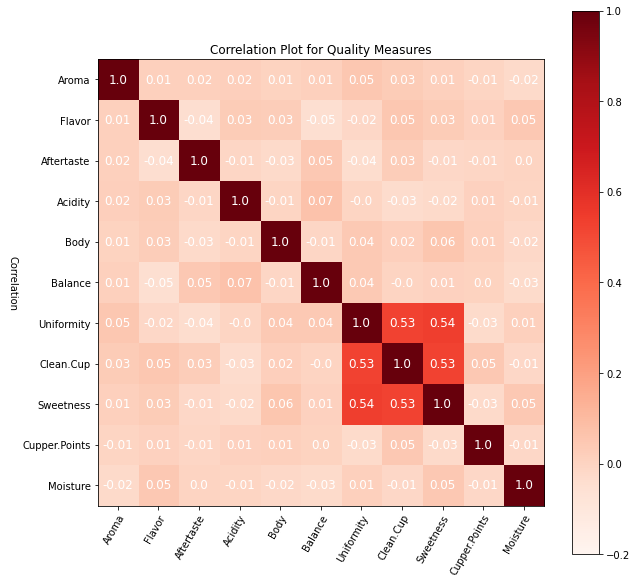

In [ ]:
# your code
Quality = ["Aroma","Flavor","Aftertaste","Acidity","Body","Balance","Uniformity","Clean.Cup","Sweetness","Cupper.Points","Moisture"]
data=df[Quality].corr(method="pearson").to_numpy()
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(data,cmap="Reds",vmin=-0.2,vmax=1)
ax.set_xticks(np.arange(len(Quality)))
ax.set_yticks(np.arange(len(Quality)))
ax.set_xticklabels(Quality)
ax.set_yticklabels(Quality)
plt.colorbar(im) 
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",rotation_mode="anchor")

for i in range(len(Quality)):
  for j in range(len(Quality)):
    text = ax.text(j, i, round(data[i, j],2),ha="center", va="center", color="w",fontsize=12)
ax.set_ylabel("Correlation",rotation=-90,labelpad=15)
ax.set_title("Correlation Plot for Quality Measures")
plt.show()

# Q7: Plotting Coffee Bean Distribution Around the World

In the dataset, `Country.of.Origin` column indicates the origin of each coffee bean. Your task in this question is to use `GeoPandas` library to display the frequency of coffee beans on a world map. 

* In the cell below, you can find a `GeoDataFrame` object that contains country names (column `name`) and geometric information (column `geometry`) for each contry. 
* Iterate over `GeoDataFrame` object. For each country, find the number of occurrence in the original dataset. (You can use `Country.of.Origin` column)
* Lastly, plot country occurrences on a world map. Some countries in the `GeoDataFrame` object will have 0 as occurrence value since they do not exist in `Country.of.Origin` column. These countries will be automatically discarded by `GeoPandas` so they will not be shown on the world map. In order to prevent this, use `missing_kwds` parameter to set a default color for as 'lightgrey' these countries. 


The result should be exactly same as the figure below. You can use `Reds` color map. Do not forget to add legend next to the world map.
![](https://i.ibb.co/Wv023bw/download.png)

In [ ]:
!pip install geopandas

import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name!="Antarctica")]
world.head()

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 37.1 MB/s 
     |████████████████████████████████| 15.4 MB 41.3 MB/s 


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


{'Fiji': 1, 'Tanzania': 41, 'W. Sahara': 1, 'Canada': 1, 'United States of America': 82, 'Kazakhstan': 1, 'Uzbekistan': 1, 'Papua New Guinea': 2, 'Indonesia': 21, 'Argentina': 1, 'Chile': 1, 'Dem. Rep. Congo': 1, 'Somalia': 1, 'Kenya': 26, 'Sudan': 1, 'Chad': 1, 'Haiti': 7, 'Dominican Rep.': 1, 'Russia': 1, 'Bahamas': 1, 'Falkland Is.': 1, 'Norway': 1, 'Greenland': 1, 'Fr. S. Antarctic Lands': 1, 'Timor-Leste': 1, 'South Africa': 1, 'Lesotho': 1, 'Mexico': 237, 'Uruguay': 1, 'Brazil': 133, 'Bolivia': 1, 'Peru': 11, 'Colombia': 184, 'Panama': 5, 'Costa Rica': 52, 'Nicaragua': 27, 'Honduras': 54, 'El Salvador': 22, 'Guatemala': 182, 'Belize': 1, 'Venezuela': 1, 'Guyana': 1, 'Suriname': 1, 'France': 1, 'Ecuador': 2, 'Puerto Rico': 5, 'Jamaica': 1, 'Cuba': 1, 'Zimbabwe': 1, 'Botswana': 1, 'Namibia': 1, 'Senegal': 1, 'Mali': 1, 'Mauritania': 1, 'Benin': 1, 'Niger': 1, 'Nigeria': 1, 'Cameroon': 1, 'Togo': 1, 'Ghana': 1, "Côte d'Ivoire": 3, 'Guinea': 1, 'Guinea-Bissau': 1, 'Liberia': 1, 'Sier

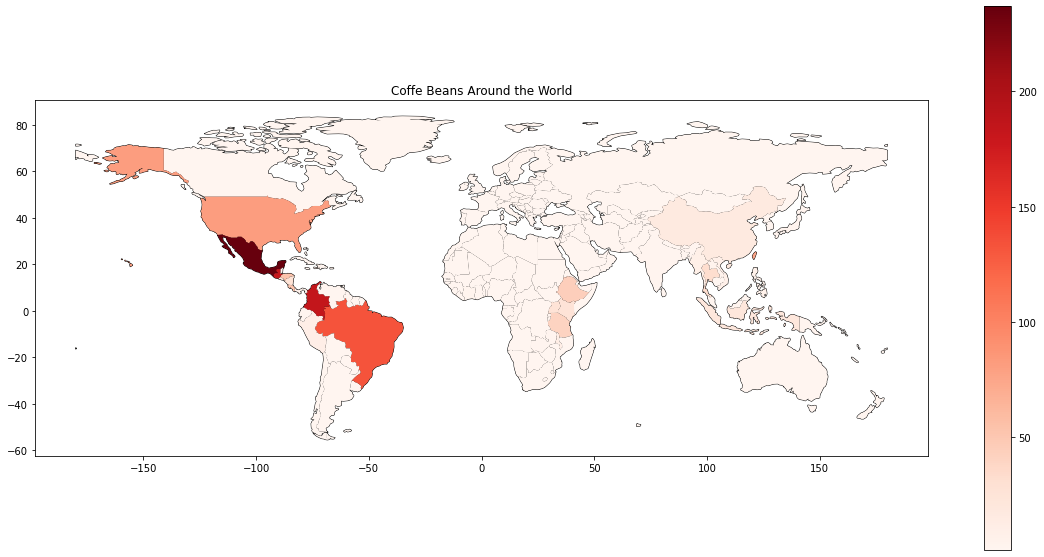

In [ ]:
# your code
index = (df.columns.get_loc("Country.of.Origin"))
methods={}
total=0
for i in list(world["name"]):
  methods[i] =1
for i in range(len(df)):
  method=df.iloc[i][index]
  if str(method) != "nan":
    total=total+1
    if method in methods.keys():
      methods[method] +=1
    else:
      methods[method] =1
      methods2[method]=[]
print(methods)
rates = pd.DataFrame(list(methods.items()),columns = ['name','rate'])
rates=world.merge(rates)
fig,ax = plt.subplots(1,1,figsize=(20,10))
world.plot(ax=ax,color='white', edgecolor='black')
rates.plot(column='rate',cmap="Reds",legend=True,ax=ax)
plt.title("Coffe Beans Around the World")
plt.show()